# KNN

In [1]:
path=  'C:/Users/felipe/Documents/Brain_Age_/'

In [2]:
import sys
sys.path.append(path) 

In [3]:
 
from sklearn.neighbors import KNeighborsRegressor
from base_regressor import BaseRegressor
from skopt.space import Real, Categorical, Integer

class KNNRegressor(BaseRegressor):
   def __init__(self, save_path=None, scaler=None, params=None, params_space=None, fit_params_search=None,model_params_search=None,fit_params_train=None,model_params_train=None, name_model="KNN"):
        super().__init__(save_path, scaler, params, params_space, fit_params_search ,model_params_search,fit_params_train ,model_params_train, name_model)
         
        self.model_ml= KNeighborsRegressor
        if params is None:
            self.params = {
                'n_neighbors': 5,  # Número de vecinos
                'weights': 'uniform',  # Pesos uniformes para todos los vecinos
                'p': 1
            }
        if params_space is None:
            self.params_space = {
                'n_neighbors': Integer(1, 50),        
                'weights': Categorical(['uniform', 'distance']),
                'p': Integer(1, 2)
            }



c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
import pandas as pd
import numpy as np
import pickle

#file_path = 'C:/Users/felipe/Documents/Brain_Age_/dataframe_alpha.xlsx'
save_path=f'{path}KNN/'
file_name = 'dataframe_alpha.xlsx'
file_path = f"{path}{file_name}"

df = pd.read_excel(file_path)
# Filtrar las filas con Age mayor de 20
df_filtrado = df[df['Age'] > 20].reset_index(drop=True)
# Separar la variable de destino (y) y las características (X)
X = df_filtrado.drop(columns=["Unnamed: 0", "Age"])
y = df_filtrado["Age"]

# Crear una instancia del modelo XGBoost
knn_model = KNNRegressor(save_path=save_path)
knn_model.set_data(X,y)

In [ ]:
opt_knn, best_params_knn = knn_model.SearchBestModel(X, y, n_iter_=1000, early_stop=False, save_result=True)
with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/KNN/Modelos/opt_KNN_model_all_features.pickle', 'wb') as file:
    pickle.dump(opt_knn, file)

In [5]:
with open(f'{path}Opt_Model/opt_KNN_model_all_features.pickle', 'rb') as file:
    opt_knn= pickle.load(file)

In [36]:
resultados = opt_knn.cv_results_
knn_model.guardar_resultados_busqueda(resultados=resultados)

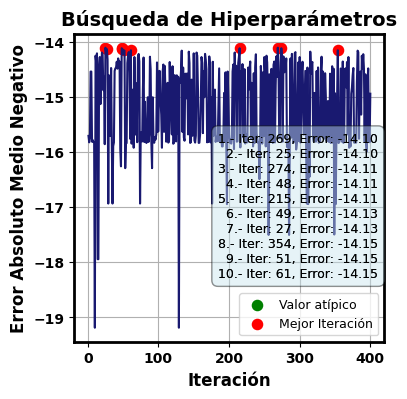

Top 1: Iteración 269, Error -14.10390772276817
Top 2: Iteración 25, Error -14.10390772276817
Top 3: Iteración 274, Error -14.113936831738542
Top 4: Iteración 48, Error -14.113936831738542
Top 5: Iteración 215, Error -14.113936831738542
Top 6: Iteración 49, Error -14.128203878015038
Top 7: Iteración 27, Error -14.129986525417758
Top 8: Iteración 354, Error -14.150672648697627
Top 9: Iteración 51, Error -14.150672648697627
Top 10: Iteración 61, Error -14.150672648697627


In [14]:
knn_model.plot_search_best_model(opt_knn, save_fig=True,linewidth=1.5, color='midnightblue')

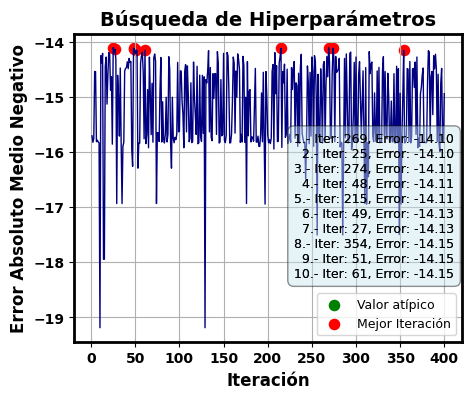

Top 1: Iteración 269, Error -14.10390772276817
Top 2: Iteración 25, Error -14.10390772276817
Top 3: Iteración 274, Error -14.113936831738542
Top 4: Iteración 48, Error -14.113936831738542
Top 5: Iteración 215, Error -14.113936831738542
Top 6: Iteración 49, Error -14.128203878015038
Top 7: Iteración 27, Error -14.129986525417758
Top 8: Iteración 354, Error -14.150672648697627
Top 9: Iteración 51, Error -14.150672648697627
Top 10: Iteración 61, Error -14.150672648697627


In [5]:
knn_model.plot_search_best_model(opt_knn, save_fig=True,x_size=5, name_set='all_features_2')

In [7]:
best_params_knn = knn_model.best_hyper(opt_knn)

In [8]:
best_params_knn

[{'n_neighbors': 14, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 14, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 10, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 10, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 10, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 9, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 15, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 11, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 11, 'p': 1, 'weights': 'distance'},
 {'n_neighbors': 11, 'p': 1, 'weights': 'distance'}]

# Trainer

In [9]:
results, best_model_results, best_model = knn_model.trainer(params_=best_params_knn[0])

In [9]:
with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/KNN/Modelos/BestModel_KNN_model_all_features.pickle', 'wb') as file:
    pickle.dump(knn_model.model, file)
with open('C:/Users/felip/Documents/memoria_2/Brain_Age_/KNN/Modelos/results_KNN_model_all_features.pickle', 'wb') as file:
    pickle.dump(results, file)

In [31]:
knn_model.guardar_resultados_trainer(resultados=results)

In [10]:
y_pred =knn_model.predicter(knn_model.X_test)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     120.9
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.52e-23
Time:                        13:33:51   Log-Likelihood:                -1007.1
No. Observations:                 276   AIC:                             2018.
Df Residuals:                     274   BIC:                             2025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8214      1.437     24.237      0.0

C:\Users/felipe/Documents/Brain_Age_\base_regressor.py:318: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


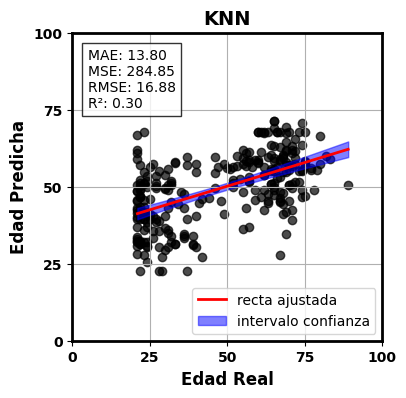

Error medio absoluto: 13.796963800646505
Error cuadrático medio: 284.846504798201
Raíz del error cuadrático medio: 16.877396268328862
Coeficiente de determinación (R²): 0.29616661798221855


In [16]:
knn_model.plot_regresion(y_pred_test=y_pred,y_test= knn_model.y_test, x_size=4,x_ticks_step=25,y_ticks_step=25,x_min_limit=0,y_min_limit=0,x_max_limit=100,y_max_limit=100, title='KNN',line_ideal=False,confidence_interval=True, save_fig=True, color='black',alpha=0.7)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.304
Method:                 Least Squares   F-statistic:                     120.9
Date:                Tue, 06 Aug 2024   Prob (F-statistic):           1.52e-23
Time:                        13:34:05   Log-Likelihood:                -1007.1
No. Observations:                 276   AIC:                             2018.
Df Residuals:                     274   BIC:                             2025.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.8214      1.437     24.237      0.0

C:\Users/felipe/Documents/Brain_Age_\base_regressor.py:318: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = linear_model.pvalues[1]


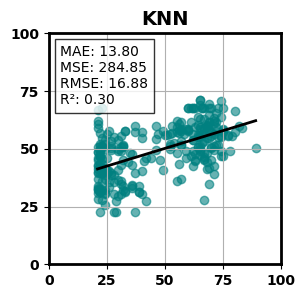

Error medio absoluto: 13.796963800646505
Error cuadrático medio: 284.846504798201
Raíz del error cuadrático medio: 16.877396268328862
Coeficiente de determinación (R²): 0.29616661798221855


In [17]:
knn_model.plot_regresion(y_pred_test=y_pred,y_test= knn_model.y_test, x_size=3,y_size=3,x_ticks_step=25,y_ticks_step=25,x_max_limit=100,y_max_limit=100,x_min_limit=0,y_min_limit=0, title='KNN',label=False,color='teal', color_line_fit="black", line_ideal=False,confidence_interval=False,legend=False,alpha=0.6)

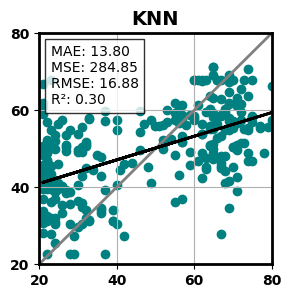

Error medio absoluto: 13.796963800646505
Error cuadrático medio: 284.846504798201
Raíz del error cuadrático medio: 16.877396268328862
Coeficiente de determinación (R²): 0.29616661798221855


In [11]:
knn_model.plot_regresion(y_pred_test=y_pred,y_test= knn_model.y_test, x_size=3,y_size=3,x_ticks_step=20,y_ticks_step=20,x_max_limit=80,y_max_limit=80,x_min_limit=20,y_min_limit=20, title='KNN',label=False,color='teal', color_line_fit="black", color_line_ideal='gray')

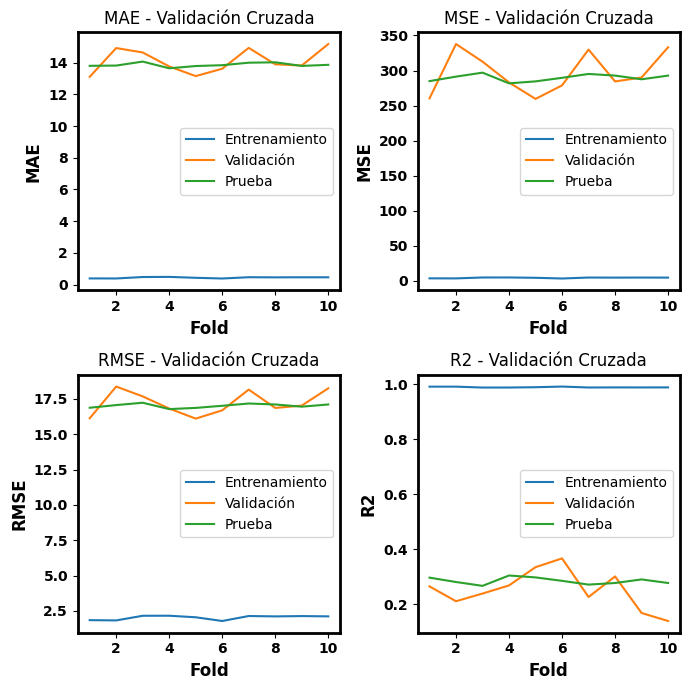

In [13]:
knn_model.plot_metricas_evaluacion(results)

In [11]:
shap_values, shap_summary_sorted = knn_model.feature_importance_shap(X_test=knn_model.X_test,model=knn_model.model)

Fallo al usar shap.Explainer, intentando con shap.KernelExplainer: The passed model is not callable and cannot be analyzed directly with the given masker! Model: KNeighborsRegressor(n_neighbors=14, p=1, weights='distance')


100%|██████████| 276/276 [08:46<00:00,  1.91s/it]

Importancia de características basada en suma de valores SHAP:
IAF_OCC_right: 315.30460601814366
IAF_OCC_left: 248.4522795925493
TF_MFG_left: 179.53734789715784
IAF_INS_left: 156.84899750134798
IAF_HPC_left: 155.678408325615
IAF_MFG_left: 153.48242742049868
IAF_IFG_left: 144.35293097452788
TF_INS_right: 136.37773683820558
IAF_INS_right: 136.3298699116961
TF_INS_left: 127.57976142013845
TF_HPC_right: 123.23254886869105
TF_HPC_left: 122.5220803364712
TF_MFG_right: 118.50849179393978
IAF_ORB_right: 116.54733200207144
TF_ORB_right: 112.38190893036484
TF_SFG_right: 110.6236931624202
Low_subj_spec_EPP_PARIET_right: 108.68937977370096
Low_subj_spec_EPP_PARIET_left: 108.39328321138767
Alpha2_canon_RPD_HPC_right: 107.9119073070211
IAF_SFG_left: 104.1805653857552
TF_SFG_left: 102.93347786357387
IAF_MFG_right: 102.90206478813282
IAF_ORB_left: 102.12358544574313
Alpha2_canon_EPP_HPC_right: 100.58002698737052
IAF_SFG_right: 99.89952449610081
TF_ORB_left: 97.62502297134576
Low_subj_spec_RPD_HPC_righ

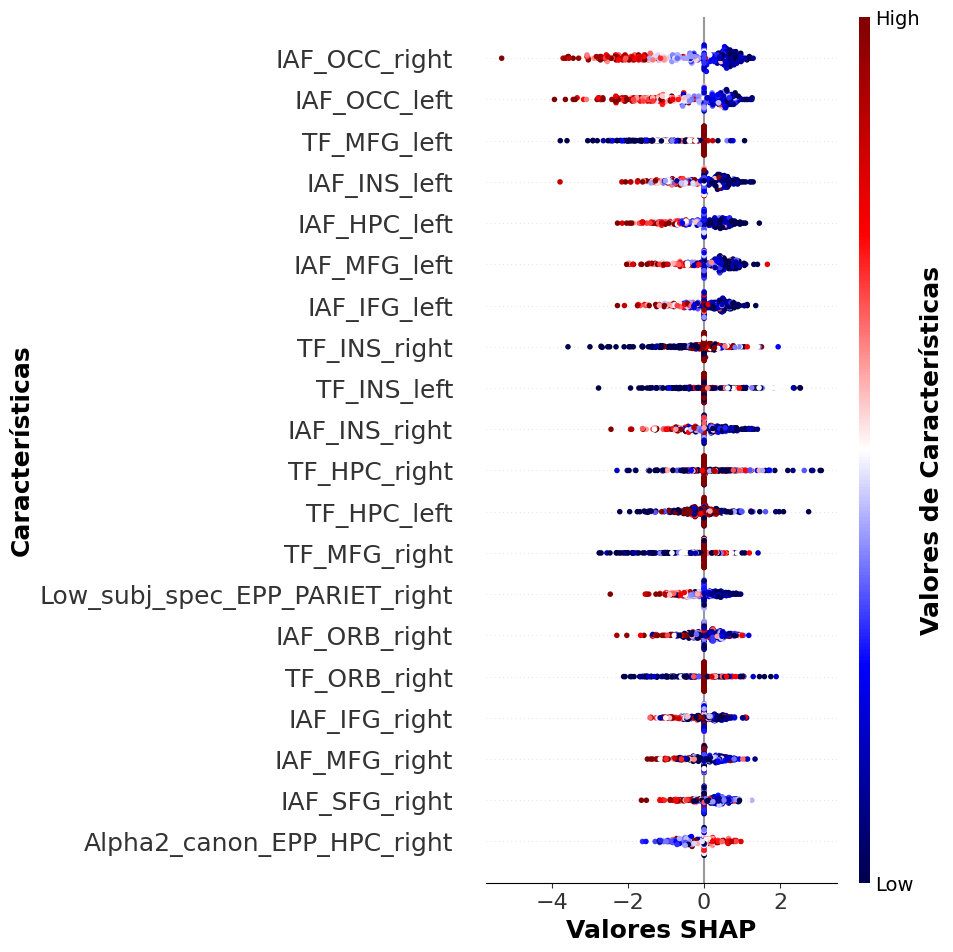

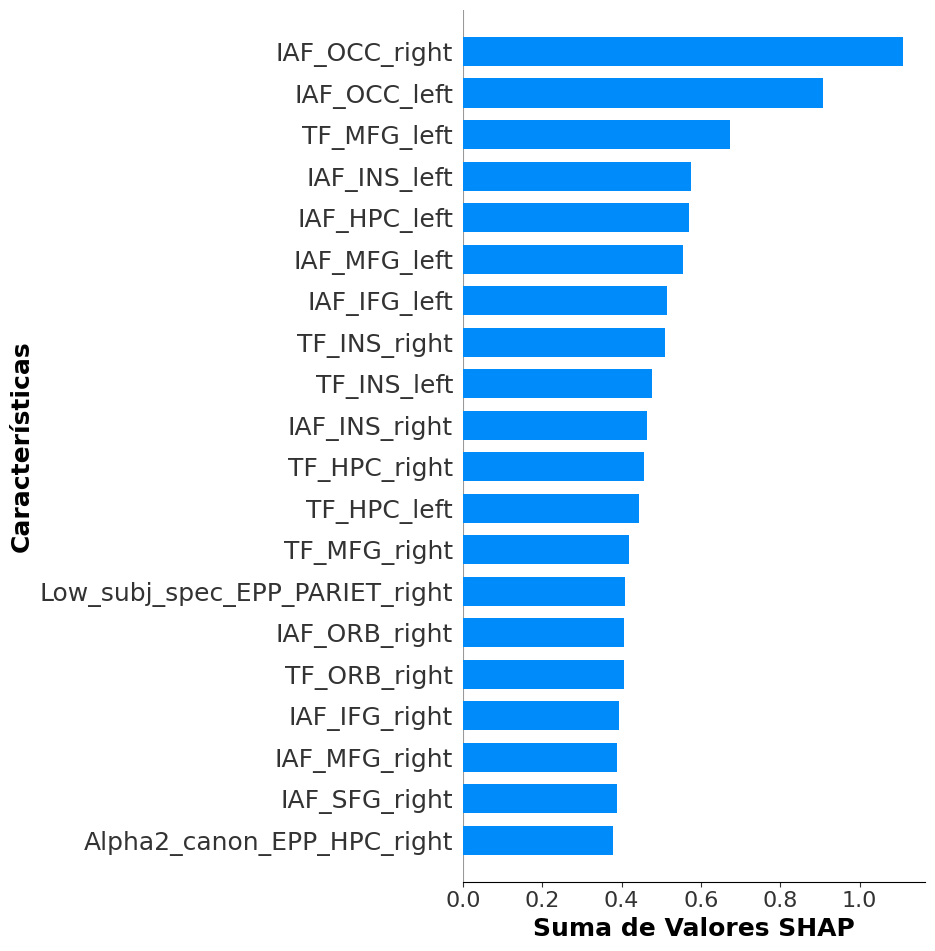

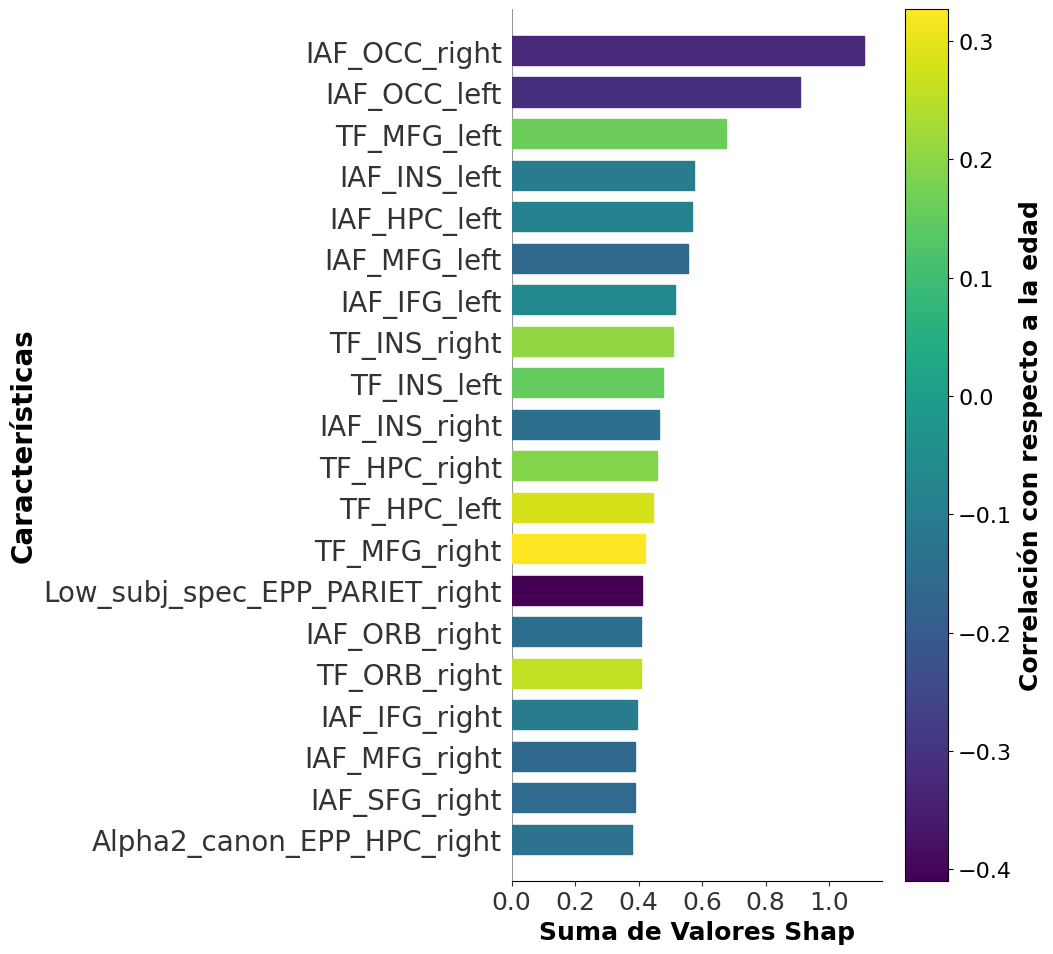

In [11]:
knn_model.plot_feature_importance(shap_values=shap_values,X_test=knn_model.X_test,y_test=knn_model.y_test, save_fig=True)

In [ ]:
shap_summary_sorted

In [13]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_knn.pickle', 'wb') as file:
        pickle.dump(shap_summary_sorted, file)

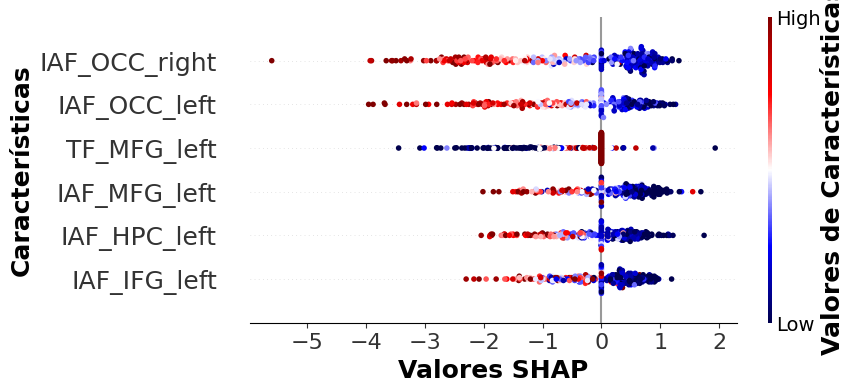

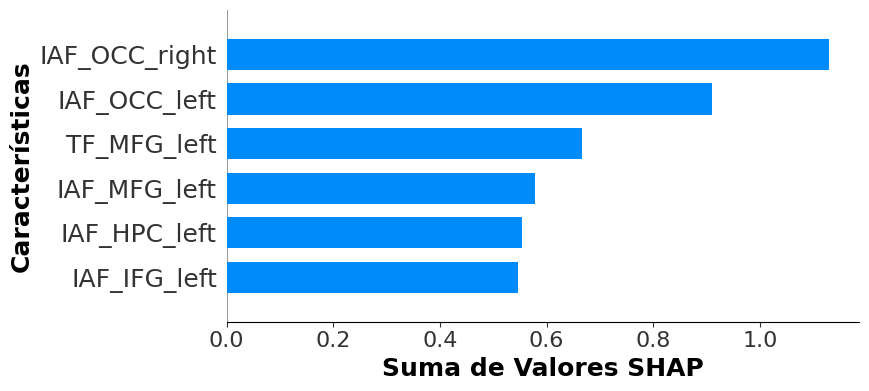

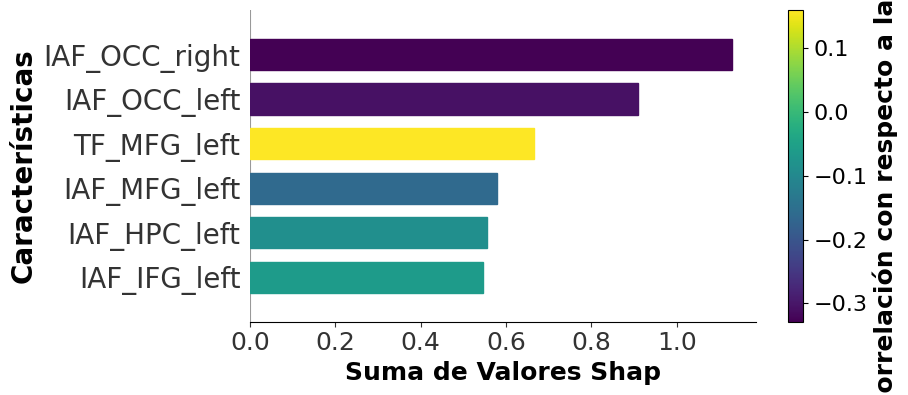

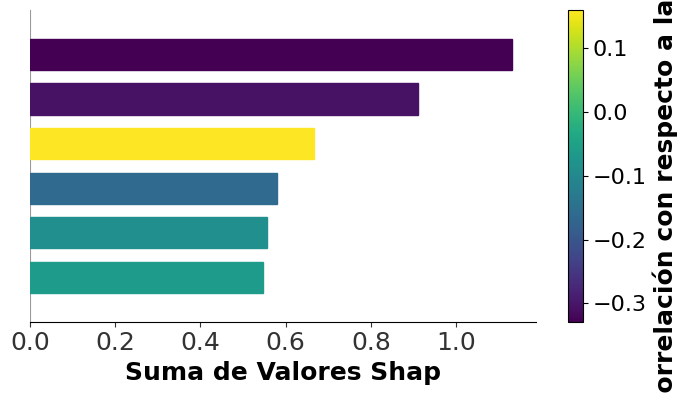

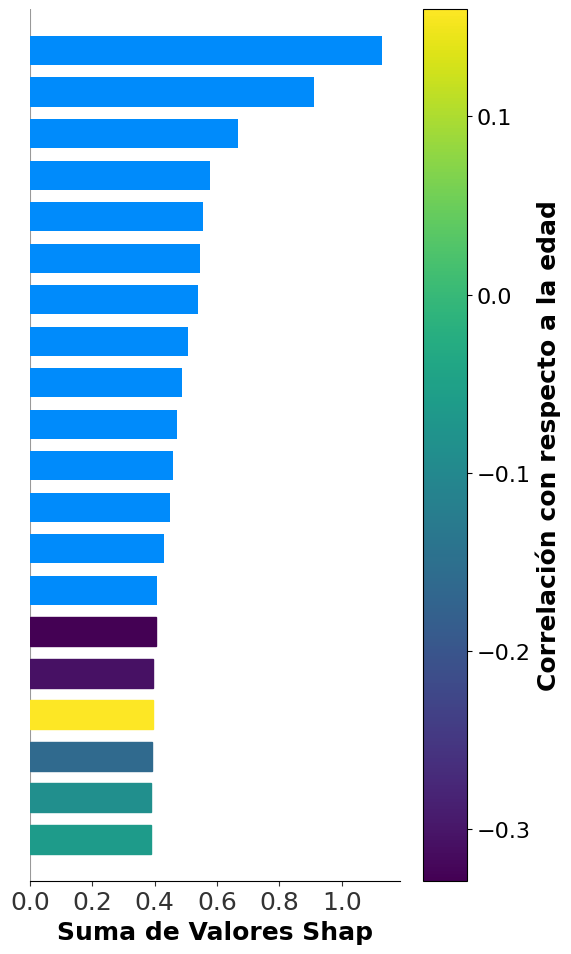

In [20]:
knn_model.plot_feature_importance(shap_values=shap_values,X_test=knn_model.X_test,y_test=knn_model.y_test, save_fig=True,max_features=6)

# Importancia por region

In [3]:
with open('C:/Users/felipe/Documents/Opt_Model/shap_summary_sorte_knn.pickle', 'rb') as file:
    shap_summary_sorted_knn = pickle.load(file)


In [4]:
shap_por_region_sorted, resultado_normalizado_sorted=knn_model.shap_region(shap_summary_sorted=shap_summary_sorted_knn, num_max=20)

MFG_left: 1.000000
OCC_right: 0.903774
INS_left: 0.856676
HPC_left: 0.825743
INS_right: 0.791354
OCC_left: 0.740174
HPC_right: 0.679906
ORB_right: 0.661606
MFG_right: 0.658576
IFG_left: 0.419484
PARIET_right: 0.333940
IFG_right: 0.320995
SFG_right: 0.317287


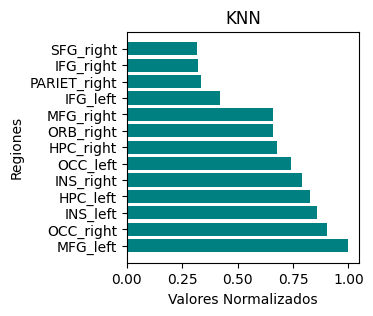

In [5]:
knn_model.plot_normalized_values(resultado_normalizado_sorted, color='teal', name_set='KNN',x_size=3,y_size=3)

c:\Users\felipe\Documents\Brain_Age_\brain_age_env\Lib\site-packages\nilearn\plotting\displays\_slicers.py:308: UserWarning: empty mask
  ims = self._map_show(img, type="imshow", threshold=threshold, **kwargs)


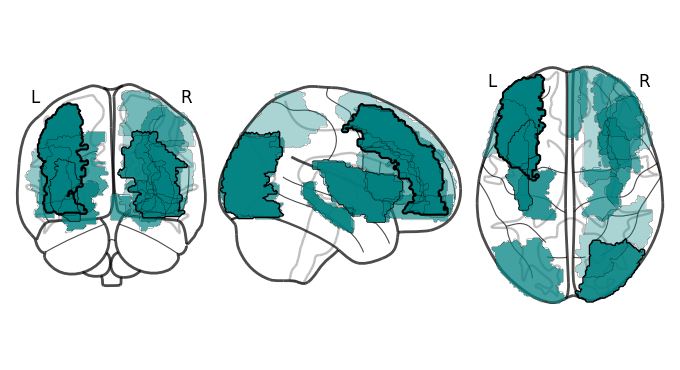

In [6]:
base_path = 'C:/Users/felipe/Documents/brain_age_/cerebritos/'

knn_model.plot_brain_regions(resultado_normalizado_sorted, base_path, color='teal')

# Incremento Metricas